### Startup task: Train and test a classification model #2 / eeg.csv dataset

#### All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '2' indicates the eye-closed and '1' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

### [Part 0: Import, Load Data](#Part-0:-Import,-Load-Data.)
#### Import, Read data from ‘eeg.csv’ file

### [Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis.)
#### Info, Columns, Head, Missing Data 
#### Observation of target variable 'Class' (visualisation: countplot)
#### Observation of all features of the dataset (visualisation: distplot and heatmap)

### [Part 2: Data Transformation](#Part-2:-Data-Transformation.)
#### Create datasets for ML 
#### 'Train\Test' splitting method

### [Part 3: Machine Learning](#Part-3:-Machine-Learning.)
#### Classification Models
#### Build and train models
#### Evaluate models
#### Hyper parameters tuning
#### Calculate the best Scalers for each ML model
#### Apply scalers to models 
#### Evaluate models with tuned hyper parameters and scalers
#### Confusion Matrix and Classification Report of the best model (KNN)
#### AUC–ROC curve of the best model (KNN)
#### Conclusion:
#### Submission of ‘eeg.csv’ file


# Part 0: Import, Load Data.

### Import 

In [41]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.metrics as metrics
from scipy.stats import norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer, Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")


### Read data from ‘eeg.csv’ file

In [72]:
# read data from 'egg.csv' file
dataset = pd.read_csv('eeg.csv') 

# Part 1: Exploratory Data Analysis.

### Info

In [73]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 15 columns):
V1       14976 non-null float64
V2       14976 non-null float64
V3       14976 non-null float64
V4       14976 non-null float64
V5       14976 non-null float64
V6       14976 non-null float64
V7       14976 non-null float64
V8       14976 non-null float64
V9       14976 non-null float64
V10      14976 non-null float64
V11      14976 non-null float64
V12      14976 non-null float64
V13      14976 non-null float64
V14      14976 non-null float64
Class    14976 non-null int64
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


Dataset consists of 14976  rows and 15 columns; 

has 2 datatypes: float64(14), int64(1);

### Columns 

In [44]:
# display the name of the dataframe columns
print(dataset.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'Class'],
      dtype='object')


### Head

In [45]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1


### Missing Data

In [46]:
# check for missing values
dataset.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
Class    0
dtype: int64

Dataset has no missing values.

### Observation of target variable 'Class' (visualisation: countplot)

__Note:__ In 'Class' column, __'1'__ indicates the __eye-open__, __'2'__ the __eye-closed state__ (based on OpenML dataset description at https://www.openml.org/d/1471).

In [47]:
# check for number of '1' and '2' in 'Class' column
dataset['Class'].value_counts()

1    8254
2    6722
Name: Class, dtype: int64

From the __output__, we can observe that there are __8254 eye-open state__ and __6722 eye-closed state__ cases in the dataset.

In [48]:
# present '1' and '2' states in %
print('1(eye-open state):', round(dataset['Class'].value_counts()[1] / len(dataset) * 100, 2), '% of the dataset')
print('2(eye-closed state):', round(dataset['Class'].value_counts()[2] / len(dataset) * 100, 2), '% of the dataset')


1(eye-open state): 55.11 % of the dataset
2(eye-closed state): 44.89 % of the dataset


Text(0.5, 1.0, 'Class Distributions (1 || 2)')

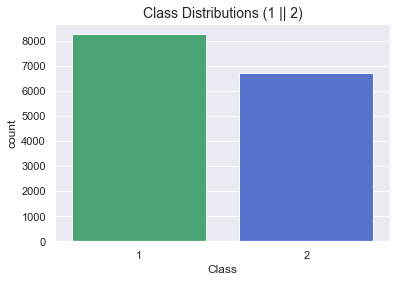

In [49]:
# visualisation of '1' and '2' states.
colors = ["mediumseagreen", "royalblue"]
sns.countplot('Class', data = dataset, palette = colors)
plt.title('Class Distributions (1 || 2)', fontsize = 14)

### Observation of all features of the dataset (visualisation: distplot and heatmap)

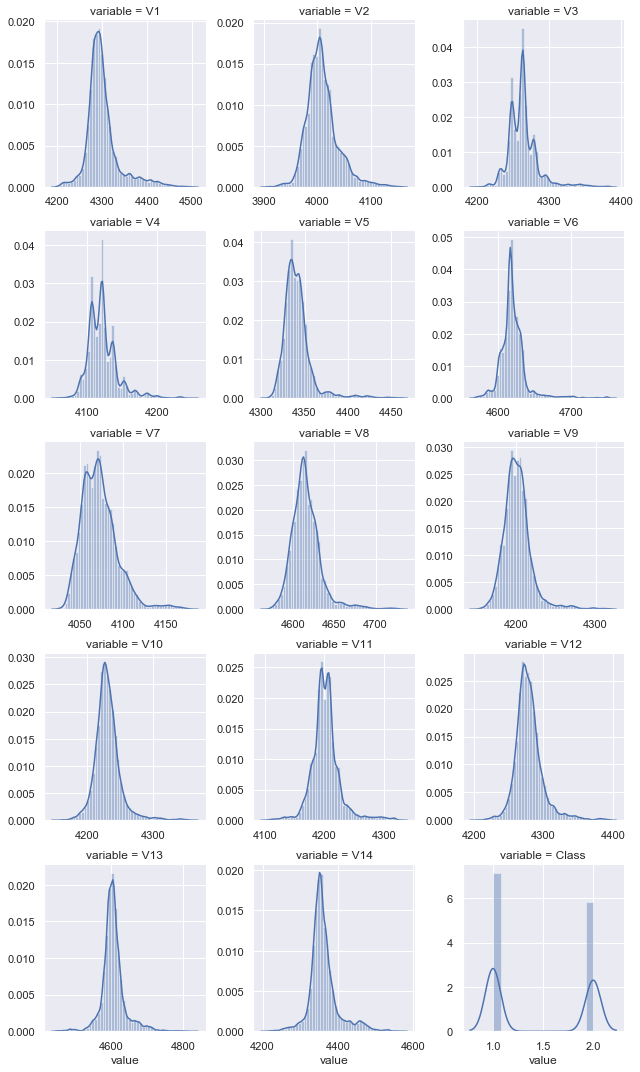

In [50]:
# visualisation of all features of the dataset
numeric_data = dataset.select_dtypes(include = [np.number])
all_features = pd.melt(dataset, value_vars=numeric_data)
grid = sns.FacetGrid(all_features, col="variable", col_wrap=3, sharex=False, sharey=False)
grid = grid.map(sns.distplot, "value", color="b") 

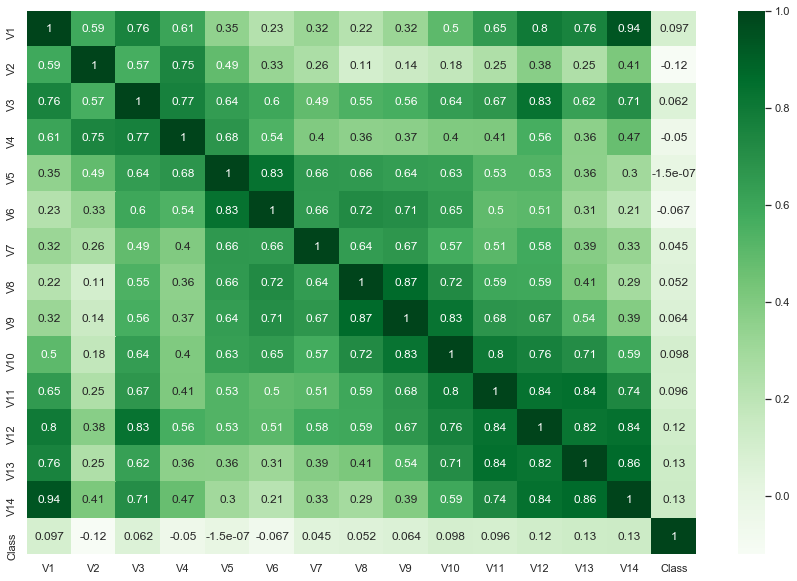

In [51]:
# correlation matrix for all features of the dataset
import seaborn as sns
corr = dataset[dataset.columns].corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale = 1)
sns.heatmap(corr, cmap = "Greens", annot = True)

# Part 2: Data Transformation.

### Note: Scalers

__Note:__ Usually, at this stage I am applying __scalers__ for data. This important process needs to be done before building and training ML models since many ML algorithms don't perform  well if the features are not on relatively similar scales. Sklearn have a number of different scalers; each works different with each model.

I decided to train several different models. Since our aim is to find the best model, I decided not to scale data with one scaler for all models, but to find the best scaler for each model individually.

Therefore, applying scalers process will be done in Part 3: Machine Learning.


### Create datasets for ML 

In [52]:
# set 'X' for features and 'y' for the target ('Class').
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [53]:
# print X dataset after dropping 'Class' column
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46


### 'Train\Test' splitting method

In [54]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here a __Train/ Test splitting method__ was applied; it splits a dataset into random train and test subsets. 
* Any random_state number (for example,  42, 0, 21, ...), can be chosen. The random_state in the code is important to be specified clearly, so that then each time we run/execute the code, it would result the same (the same values in train and test datasets).For instance within the documentation, in order for everyone to consistently see the same numbers, each time the examples are run. My suggestion is that the random_state can be set to some fixed number while testing, but it is then removed in production if a random split (not a fixed one) is really needed.

* Parameter __'test_size'__ represents the proportion of the dataset to include in the test split. 
* Parameter __'random_state'__ represents the seed used by the random number generator.
* Both parameters were choosen to be __'test_size'= 0.3, 'random_state'= 42__ as the 'best fit' for this dataset after a number of experiments (test_size=0.2, random_state=0; test_size=0.2, random_state=42; test_size=0.3, random_state=0).

In [55]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((10483, 14), (10483,))

In [56]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((4493, 14), (4493,))

__After Train/Test splitting: 'Train'__ dataset consists of 10483 rows and 14 columns; __'Test'__ dataset consists of 4493 rows and 14 columns.

# Part 3: Machine Learning.

### Classification Models

In ML process, to train and compare results of many classifiers, is an effective way. Different algorithms may perform differently on different datasets. We will try the following models:

* Logistic Regression
* K-Nearest Neighbours
* Support Vector Machine
* Decision Tree
* Random Forest
* Gradient Boosting

### Build and train models


Here models will be built and trained with their default state.

In [57]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbours
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Support Vector Machine
SVCc = svm.SVC()
SVCc.fit(X_train, y_train)
SVCc_pred = SVCc.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

# Random Forest
RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

# Gradient Boosting
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)

# Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

### Evaluate models

Here models' accuracy without hyper parameters tuned will be calculated and presented in a table.

In [58]:
# calculation of models accuracy without hyper parameters tuned
LR_accuracy = accuracy_score(LR_pred, y_test)
KNN_accuracy = accuracy_score(KNN_pred, y_test)
SVCc_accuracy = accuracy_score(SVCc_pred, y_test)
DT_accuracy = accuracy_score(DT_pred, y_test)
RF_accuracy = accuracy_score(RF_pred, y_test)
GB_accuracy = accuracy_score(GB_pred, y_test)
NB_accuracy = accuracy_score(NB_pred, y_test)

# visualisation table
table = {
  'Model': ['Logistic Regression', 'K-Nearest Neighbours', 'Support Vector Machine',
            'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Naive Bayes'],
  'Accuracy without hyper parameters tuned': [LR_accuracy, KNN_accuracy, SVCc_accuracy,
    DT_accuracy, RF_accuracy, GB_accuracy, NB_accuracy]}

final_table = pd.DataFrame(data = table)
# print table
final_table

,Model,Accuracy without hyper parameters tuned
0,Logistic Regression,0.631427
1,K-Nearest Neighbours,0.965502
2,Support Vector Machine,0.541954
3,Decision Tree,0.839083
4,Random Forest,0.890941
5,Gradient Boosting,0.812597
6,Naive Bayes,0.606944


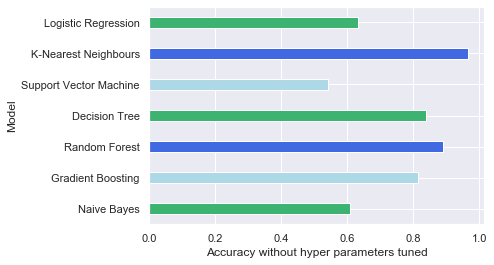

In [59]:
# visualisation plot
x = ['Naive Bayes', 'Gradient Boosting', 'Random Forest', 'Decision Tree',
     'Support Vector Machine', 'K-Nearest Neighbours', 'Logistic Regression']
y = [NB_accuracy, GB_accuracy, RF_accuracy,  DT_accuracy, SVCc_accuracy, KNN_accuracy, LR_accuracy,]
colors = ["mediumseagreen", "lightblue", "royalblue", "mediumseagreen",
          "lightblue", "royalblue", "mediumseagreen"]
fig, ax = plt.subplots()
plt.barh(y = range(len(x)), tick_label = x, width = y, height = 0.35, color = colors);
ax.set(xlabel = 'Accuracy without hyper parameters tuned', ylabel = 'Model');



At this stage, our leader is __K-Nearest Neighbours__ model with __accuracy = 0.965502__. The good results also shown by Random Forest (0.890941), Decision Tree (0.839083), Gradient Boosting (0.812597). 

### Hyper parameters tuning

The next step will be tuning of models hyper parameters (It is a very important step in order to improve the results of models).
* In order to find the best paramters for each model, the Grid Search was choosen for tuning models.
* About hyper parameters. Parameters itself were choosen based on information from https://scikit-learn.org .
* A decision about 'which parameters and their attributes to choose for Grid Search' was made for each model individually. Parameters and their attributes can be different for other datasets.
* As an example, let me use KNN model:
       1. A default state of the model was checked with code:
            KNN = KNeighborsClassifier()
            KNN.fit(X_train, y_train)  
            
            An output was:
            KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
                     
       2. An information from https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
             was vey helpful. After trying various combinations (algorithm, leaf_size, metric, metric_params, n_jobs, 
             n_neighbors, p, weights), the best one for this dataset was found: 'n_neighbors':[1].
             
* Note: The quantity of parameters and their attributes can affect a model's evaluation calculation. The more parameters and their attributes applied, the longer the process of calculations will be.             

In [60]:
# models hyper parameters set
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'solver':['lbfgs'], 'random_state':[0]}
KNN_params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
SVC_params = {'C': [1,3,5,8,10], 'kernel': ['linear', 'rbf'], 'random_state':[0]}
DT_params = {'max_depth':[1,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
RF_params = {'criterion':['gini','entropy'], 'n_estimators':[1,10,100 ], 'random_state':[0]}
GB_params = {'learning_rate':[0.5], 'loss':['exponential'], 'n_estimators':[2000], 'random_state':[0]}

# tune models with hyper parameters set
LR1 = GridSearchCV(LR, param_grid = LR_params)
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)
SVCc1 = GridSearchCV(SVCc, param_grid = SVC_params)
DT1 = GridSearchCV(DT, param_grid = DT_params)
RF1 = GridSearchCV(RF, param_grid = RF_params)
GB1 = GridSearchCV(GB, param_grid = GB_params)

# fit models
LR1.fit(X_train, y_train)
KNN1.fit(X_train, y_train)
SVCc1.fit(X_train, y_train)
DT1.fit(X_train, y_train)
RF1.fit(X_train, y_train)
GB1.fit(X_train, y_train)

# print the best hyper parameters set
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Support Vector Machine Best Hyper Parameters:", SVCc1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)
print("Random Forest Best Hyper Parameters:         ", RF1.best_params_)
print("Gradient Boosting Best Hyper Parameters:     ", GB1.best_params_)

# predictions
LR1_pred = LR1.predict(X_test)
KNN1_pred = KNN1.predict(X_test)
SVCc1_pred = SVCc1.predict(X_test)
DT1_pred = DT1.predict(X_test)
RF1_pred = RF1.predict(X_test)
GB1_pred = GB1.predict(X_test)


Logistic Regression Best Hyper Parameters:    {'C': 5, 'random_state': 0, 'solver': 'lbfgs'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 1}
Support Vector Machine Best Hyper Parameters: {'C': 8, 'kernel': 'linear', 'random_state': 0}
Decision Tree Best Hyper Parameters:          {'criterion': 'entropy', 'max_depth': 20, 'random_state': 0}
Random Forest Best Hyper Parameters:          {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}
Gradient Boosting Best Hyper Parameters:      {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 2000, 'random_state': 0}


The best hyper parameters for each model were found and applied.

__Note:__ Naive Bayes model has two hyper parameters, but they are not for tuning, therefore not in a GridSearch. Naive Bayes model will be further trained and evaluated with its default state.

### Calculate the best Scalers for each ML model

As had been mentioned above, I decided to train several different models. Since our aim is to find the best model, I decided not to scale data with one scaler for all models, but to find the best scaler for each model individually.

For this purpose, I will compare all models with all scalers (see code below). This process has 3 steps:
1st: compare all models without any hyper parameters tuned with all scalers; find the best scores.
2nd: compare all models with hyper parameters tuned with all scalers; find the best scores.
3rd: compare scores from 1st and 2nd steps; find the best scores, identify the best scaler for each model.

Scalers were taken from https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html?highlight=scaler


In [61]:
# models without hyper parameters tuned
models = []

#models.append(("Logistic Regression:", LogisticRegression()))
#models.append(("K-Nearest Neighbour:", KNeighborsClassifier()))
#models.append(("Support Vector Machine-linear:", SVC()))
#models.append(("Decision Tree:", DecisionTreeClassifier(random_state = 0)))
#models.append(("Random Forest:", RandomForestClassifier(random_state = 0)))
#models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))
#models.append(("Naive Bayes:", GaussianNB()))

# models with hyper parameters tuned
#models = []

#models.append(("Logistic Regression:", LogisticRegression(C = 5, solver = 'lbfgs', random_state = 0)))
#models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors = 1)))
#models.append(("Support Vector Machine-rbf:", SVC(C = 8, kernel = "rbf", random_state = 0)))
#models.append(("Decision Tree:", DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state = 0)))
#models.append(("Random Forest:", RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 0)))
#models.append(("GradientBoostingClassifier:", GradientBoostingClassifier(learning_rate = 0.5, loss = 'exponential', n_estimators = 2000, random_state = 0)))
#models.append(("Naive Bayes:", GaussianNB(priors = [0.55, 0.45], var_smoothing = 0.0001)))

In [62]:
names = []

for name, model in models:

    # scalers
    scaler1 = StandardScaler()
    scaler2 = MinMaxScaler()
    scaler3 = MaxAbsScaler()
    scaler4 = RobustScaler()
    scaler5 = QuantileTransformer(output_distribution = 'normal')
    scaler6 = QuantileTransformer(output_distribution = 'uniform')
    scaler7 = PowerTransformer()
    scaler8 = Normalizer()

    # build and train models
    X_train_scaled1 = scaler1.fit_transform(X_train)
    X_test_scaled1 = scaler1.transform(X_test)
    model.fit(X_train_scaled1, y_train)
    pred1 = model.predict(X_test_scaled1)

    X_train_scaled2 = scaler2.fit_transform(X_train)
    X_test_scaled2 = scaler2.transform(X_test)
    model.fit(X_train_scaled2, y_train)
    pred2 = model.predict(X_test_scaled2)
    
    X_train_scaled3 = scaler3.fit_transform(X_train)
    X_test_scaled3 = scaler3.transform(X_test)
    model.fit(X_train_scaled3, y_train)
    pred3 = model.predict(X_test_scaled3)

    X_train_scaled4 = scaler4.fit_transform(X_train)
    X_test_scaled4 = scaler4.transform(X_test)
    model.fit(X_train_scaled4, y_train)
    pred4 = model.predict(X_test_scaled4)

    X_train_scaled5 = scaler5.fit_transform(X_train)
    X_test_scaled5 = scaler5.transform(X_test)
    model.fit(X_train_scaled5, y_train)
    pred5 = model.predict(X_test_scaled5)

    X_train_scaled6 = scaler6.fit_transform(X_train)
    X_test_scaled6 = scaler6.transform(X_test)
    model.fit(X_train_scaled6, y_train)
    pred6 = model.predict(X_test_scaled6)

    X_train_scaled7 = scaler7.fit_transform(X_train)
    X_test_scaled7 = scaler7.transform(X_test)
    model.fit(X_train_scaled7, y_train)
    pred7 = model.predict(X_test_scaled7)

    X_train_scaled8 = scaler8.fit_transform(X_train)
    X_test_scaled8 = scaler8.transform(X_test)
    model.fit(X_train_scaled8, y_train)
    pred8 = model.predict(X_test_scaled8)

    # accuracy calculation
    accuracy1 = accuracy_score(pred1, y_test)
    accuracy2 = accuracy_score(pred2, y_test)
    accuracy3 = accuracy_score(pred3, y_test)
    accuracy4 = accuracy_score(pred4, y_test)
    accuracy5 = accuracy_score(pred5, y_test)
    accuracy6 = accuracy_score(pred6, y_test)
    accuracy7 = accuracy_score(pred7, y_test)
    accuracy8 = accuracy_score(pred8, y_test)

    names.append(name)

for i in range(len(names)):

    # visualisation table
    df = pd.DataFrame({"Model": [names[i], names[i], names[i], names[i], names[i], names[i], names[i], names[i]],
                       "Scaler": [scaler1, scaler2, scaler3, scaler4, scaler5, scaler6, scaler7, scaler8],
                       "Accuracy": [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8]})

    # print table
    df

As a result, the best scalers are:

* Logistic Regression - QuantileTransformer(output_distribution = 'uniform')
* K-Nearest Neighbours - Normalizer()
* Support Vector Machine - QuantileTransformer(output_distribution = 'normal')
* Decision Tree - No scaler (independent from scaleers)
* Random Forest - MinMaxScaler()
* Gradient Boosting - No scaler (independent from scaleers)
* Naive Bayes - No scaler (independent from scaleers)




### Apply scalers to models 

In [63]:
# Logistic Regression
scaler = QuantileTransformer(output_distribution = 'uniform')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
LR1.fit(X_train_scaled, y_train)
LR2_pred = LR1.predict(X_test_scaled)

# K-Nearest Neighbours
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
KNN1.fit(X_train_scaled, y_train)
KNN2_pred = KNN1.predict(X_test_scaled)

# Support Vector Machine
scaler = QuantileTransformer(output_distribution = 'normal')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
SVCc1.fit(X_train_scaled, y_train)
SVCc2_pred = SVCc1.predict(X_test_scaled)

# Random Forest
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
RF1.fit(X_train_scaled, y_train)
RF2_pred = RF1.predict(X_test_scaled)

### Evaluate models with tuned hyperparameters and scalers


The accuracy of models will be calculated and presented in a table and plot below:
* without hyper parameters tuned
* with hyper parameters tuned 
* with hyper parameters tuned + scalers 

In [64]:
# accuracy calculation
LR_accuracy = accuracy_score(LR_pred, y_test)
LR1_accuracy = accuracy_score(LR1_pred, y_test)
LR2_accuracy = accuracy_score(LR2_pred, y_test)

KNN_accuracy = accuracy_score(KNN_pred, y_test)
KNN1_accuracy = accuracy_score(KNN1_pred, y_test)
KNN2_accuracy = accuracy_score(KNN2_pred, y_test)

SVCc_accuracy = accuracy_score(SVCc_pred, y_test)
SVCc1_accuracy = accuracy_score(SVCc1_pred, y_test)
SVCc2_accuracy = accuracy_score(SVCc2_pred, y_test)

DT_accuracy = accuracy_score(DT_pred, y_test)
DT1_accuracy = accuracy_score(DT1_pred, y_test)

RF_accuracy = accuracy_score(RF_pred, y_test)
RF1_accuracy = accuracy_score(RF1_pred, y_test)
RF2_accuracy = accuracy_score(RF2_pred, y_test)

GB_accuracy = accuracy_score(GB_pred, y_test)
GB1_accuracy = accuracy_score(GB1_pred, y_test)

NB_accuracy = accuracy_score(NB_pred, y_test)

# visualisation table
table = {'Model': ['Logistic Regression', 'K-Nearest Neighbours','Support Vector Machine', 
                   'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Naive Bayes'], 
         'Accuracy without hyper parameters tuned': [LR_accuracy, KNN_accuracy, SVCc_accuracy, 
                                                     DT_accuracy, RF_accuracy, GB_accuracy, NB_accuracy],
         'Accuracy with hyper parameters tuned': [LR1_accuracy, KNN1_accuracy, SVCc1_accuracy, 
                                                 DT1_accuracy, RF1_accuracy, GB1_accuracy, NB_accuracy],
         'Accuracy (Hyp tuned + Scaler)': [LR2_accuracy, KNN2_accuracy, SVCc2_accuracy, 
                                          DT1_accuracy, RF2_accuracy, GB1_accuracy, NB_accuracy]}

final_table2 = pd.DataFrame(data = table)
# print table
final_table2

,Model,Accuracy without hyper parameters tuned,Accuracy with hyper parameters tuned,Accuracy (Hyp tuned + Scaler)
0,Logistic Regression,0.631427,0.632094,0.643668
1,K-Nearest Neighbours,0.965502,0.973737,0.977075
2,Support Vector Machine,0.541954,0.638994,0.946584
3,Decision Tree,0.839083,0.841531,0.841531
4,Random Forest,0.890941,0.924104,0.924549
5,Gradient Boosting,0.812597,0.940574,0.940574
6,Naive Bayes,0.606944,0.606944,0.606944


At this stage, we can __compare models' accuracy__: 
* without hyper parameters tuned
* with hyper parameters tuned 
* with hyper parameters tuned + scalers 

Our leader has remain the same:
* __K-Nearest Neighbours__ model improves its accuracy __from 0.965502 to 0.977075__;
* big improvement can be seen at __Support Vector Machine__ model - __from 0.541954 to 0.946584__;
* __Gradient Boosting__ improves its accuracy __from 0.812597 to 0.940574__;
* __Random Forest__ improves its accuracy __from 0.894948 to 0.924549__;
* __Decision Tree__ improves its accuracy __from 0.839083 to 0.841531__;
* __Logistic Regression__	has improved a bit __from 0.631427 to 0.643668__;
* __Naive Bayes__ model accuracy score remain __the same__.
    
Now, we have __the best models: K-Nearest Neighbours__.

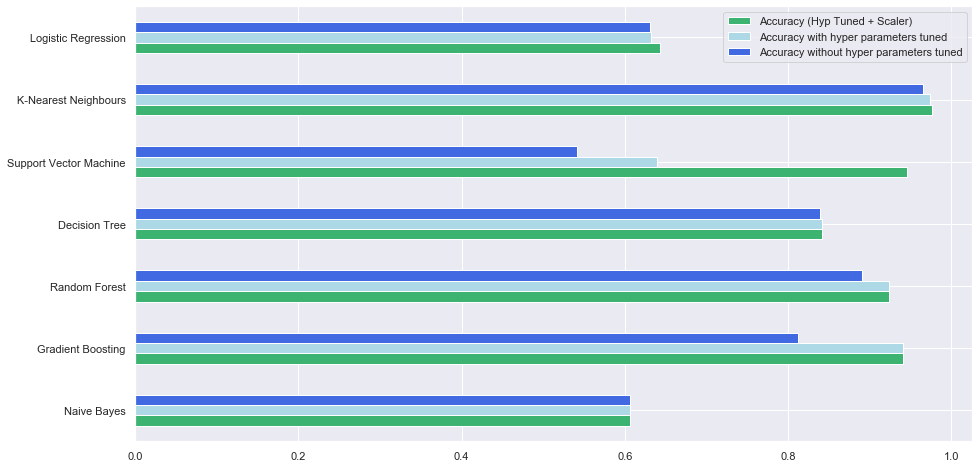

In [65]:
# visualisation plot
acc_no_hyp = [NB_accuracy, GB_accuracy, RF_accuracy, DT_accuracy, SVCc_accuracy, KNN_accuracy, LR_accuracy]
acc_with_hyp = [NB_accuracy, GB1_accuracy, RF1_accuracy, DT1_accuracy, SVCc1_accuracy, KNN1_accuracy, LR1_accuracy]
acc_hyp_scaler = [NB_accuracy, GB1_accuracy, RF2_accuracy, DT1_accuracy, SVCc2_accuracy, KNN2_accuracy, LR2_accuracy]

index = ['Naive Bayes', 'Gradient Boosting', 'Random Forest', 'Decision Tree', 'Support Vector Machine',
         'K-Nearest Neighbours', 'Logistic Regression']

df = pd.DataFrame({'Accuracy (Hyp Tuned + Scaler)': acc_hyp_scaler,
                   'Accuracy with hyper parameters tuned': acc_with_hyp,
                   'Accuracy without hyper parameters tuned': acc_no_hyp}, index = index)

# set the colors
colors = ['mediumseagreen', 'lightblue', 'royalblue']
# make the plots
ax = df.plot.barh(figsize = (15, 8), color = colors)



### Confusion Matrix and Classification Report of the best model (KNN)

Next step will be creating 2 Confusion Matrix and 2 Classification Report of KNN model (without hyper parameters tuned and with hyper parameters tuned + scaler) to understand evaluation metrics better.

__Confusion Matrix__ is a performance measurement for ML classification problem where output can be two or more classes.
It is extremely useful for measuring Recall, Precision, F1, Accuracy and most importantly AUC-ROC Curve.

* __True Positive (TP)__:
    Interpretation: predicted positive and it is true.

* __True Negative (TN)__:
    Interpretation: predicted negative and it is true.

* __False Positive (FP)__: (Type 1 Error)
    Interpretation: predicted positive and it is false.

* __False Negative (FN)__: (Type 2 Error)
    Interpretation: predicted negative and it is false.
    

__Classification Report__ is a text report showing the main classification metrics:

* __Precision__: Ratio of correctly predicted positive observations to the total predicted positive observations.
     Precision = TP / (TP + FP)
    
* __Recall__: Ratio of correctly predicted positive observations to the all observations in actual class.
    Recall = TP / (TP + FN)

* __F1__: Weighted average of Precision and Recall.
    F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    
* __Support__: Number of actual occurrences of the class in the specified dataset.

* __Accuracy__: Ratio of correctly predicted observation to the total observations.
    Accuracy = TP+TN / TP + FP + FN + TN
    
* __Macro-average__: Averaging the unweighted mean per label.
* __Weighted average__: Averaging the support-weighted mean per label

__Note:__ Let us remember, in a given dataset  __'1'__ indicates the __eye-open__, __'2'__ the __eye-closed state__.

K-Nearest Neighbours without hyper parameters tuned:
K-Nearest Neighbours Confusion Matrix


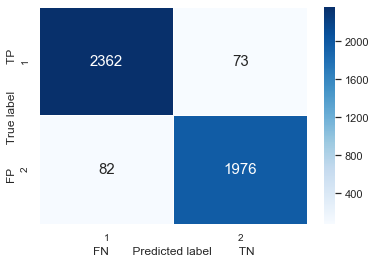


K-Nearest Neighbours Classification Report: 
               precision    recall  f1-score   support

           1   0.966448  0.970021  0.968231      2435
           2   0.964373  0.960155  0.962260      2058

    accuracy                       0.965502      4493
   macro avg   0.965411  0.965088  0.965245      4493
weighted avg   0.965498  0.965502  0.965496      4493


K-Nearest Neighbours with hyper parameters tuned + scaler:
K-Nearest Neighbours Confusion Matrix


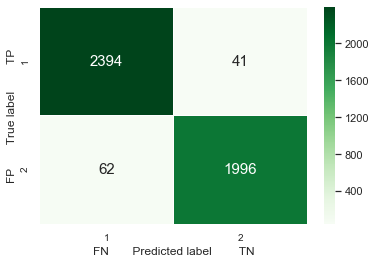


K-Nearest Neighbours Classification Report: 
               precision    recall  f1-score   support

           1   0.974756  0.983162  0.978941      2435
           2   0.979872  0.969874  0.974847      2058

    accuracy                       0.977075      4493
   macro avg   0.977314  0.976518  0.976894      4493
weighted avg   0.977099  0.977075  0.977066      4493



In [66]:
# confusion matrix of KNN model without hyper parameters tuned
print('K-Nearest Neighbours without hyper parameters tuned:')
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print('K-Nearest Neighbours Confusion Matrix')
# visualisation
ax = plt.subplot()
sns.heatmap(KNN_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '2'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '2'], fontsize = 10)
plt.show()
print()
# classification report of KNN model without hyper parameters tuned
print("K-Nearest Neighbours Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print()

# confusion matrix of KNN model with hyper parameters tuned + scaler
print('K-Nearest Neighbours with hyper parameters tuned + scaler:')
KNN1_confusion_mx = confusion_matrix(y_test, KNN2_pred)
print('K-Nearest Neighbours Confusion Matrix')
# visualisation
ax = plt.subplot()
sns.heatmap(KNN1_confusion_mx, annot = True, fmt = 'd', cmap = 'Greens', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '2'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '2'], fontsize = 10)
plt.show()
print()
# classification report of KNN model with hyper parameters tuned + scaler
print("K-Nearest Neighbours Classification Report: \n", classification_report(y_test, KNN2_pred, digits = 6))   

* #### Confusion Matrix.
    
As can be seen above, Confusion Matrix of K-Nearest Neighbours model without hyper parameters tuned shows:
    
* True Positive (TP):  __2362__
* True Negative (TN):  __1976__
* False Positive (FP): __73__
* False Negative (FN): __82__

With hyper parameters tuned + scaler it has improved:
* True Positive (TP):  __2394__
* True Negative (TN):  __1996__
* False Positive (FP): __41__
* False Negative (FN): __62__

It shows that with hyper parameters tuned, the number of '1' and '2' (which was predicted correctly) was raised (from 2362 to 2394 and from 1976 to 1996), and the number of errors in prediction has decreased (from 73 to 41 and from 82 to 62).

* #### Classification Report.

As can be seen above, Classification Report of K-Nearest Neighbours model without hyperparameters tuned shows: 
* Accuracy = __0.965502__      
With hyperparameters tuned + scaler it has improved:
* Accuracy = __0.977075__              

### AUC–ROC curve of the best model (KNN)

Accuracy is a good measure for the model, but __AUC–ROC curve__ is more important. It tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

__AUC–ROC curve__ is the model selection metric for a bi–multi class classification problem. __ROC__ is a probability curve for different classes. A typical ROC curve has a False Positive Rate (FPR) on the X-axis and a True Positive Rate (TPR) on the Y-axis.

In [67]:
# K-Nearest Neighbours with hyper parameters tuned + scaler
KNN1 = KNeighborsClassifier(n_neighbors = 1)
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
KNN1.fit(X_train_scaled, y_train)
KNN2_pred = KNN1.predict(X_test_scaled)

In [68]:
# print accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, KNN2_pred))

Accuracy:  0.9770754507010906


In [69]:
KNN_pred_proba = KNN1.predict_proba(X_test_scaled)[:,1]
auc = metrics.roc_auc_score(y_test, KNN_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test, KNN_pred_proba, pos_label = True)
print("AUC: ", auc)


AUC:  0.9765179407051762


AUC = 0.9765179407051762.
Now, let us remember our Confusion Matrix, where:
* True Positive (TP): 2394
* False Positive (FP): 41

It shows us that TP is much higher than FP.

It is time for visualisation.


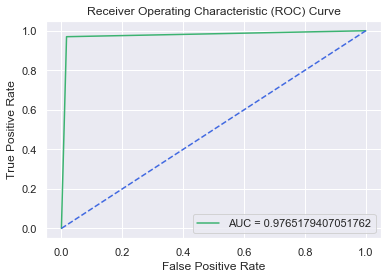

In [70]:
# visualisation
plt.plot(tpr, fpr, color = 'mediumseagreen', label = "AUC = " + str(auc))
plt.plot([0, 1], [0, 1], color = 'royalblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 4)
plt.show()

The area covered by the curve is the area between the blue line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the ML model is at distinguishing the given classes. Ideal value for AUC is 1. Our value for __AUC is 0.9765179407051762.__

### Conclusion:

For this dataset the best classification model is __K-Nearest Neighbours__ with hyper parameter {'n_neighbors': 1} and applied scaler Normalizer(); 

It gives the results:
* Accuracy:  __0.9770754507010906__
* AUC:  __0.9765179407051762__
* True Positive (TP):  __2394__
* True Negative (TN):  __1996__
* False Positive (FP): __41__
* False Negative (FN): __62__


### Submission of ‘.csv’ file

In [71]:
# submission of 'csv' file with 'Class' predictions.
sub = pd.DataFrame()
sub['Class'] = KNN2_pred
sub.to_csv('#2_egg_submission_AnastasiaRizzo.csv', index = False)